In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def make_d(x, pt_k, pt_n=1):
    p1 = np.clip(x - pt_k, 0, np.inf) ** 3
    p2 = np.clip(x - pt_n, 0, np.inf) ** 3
    return (p1 - p2) / (pt_n - pt_k)

def spline(x, k):
    n = len(x)
    if k == 0:
        return np.ones_like(x)
    elif k == 1:
        return x
    else:
        pt_k = x[k-2]
        pt_n = x[-1]
        pt_nm1= x[-2]
        return make_d(x, pt_k, pt_n) - make_d(x, pt_nm1, pt_n)

# def spline(x, k):
#     n = len(x)
#     if k <= 3:
#         return np.power(x, k)
#     else:
#         pt_k = x[k-4]
#         return np.clip((x - pt_k) ** 3, 0, np.inf)

def make_N_Omega(x):
    N = np.array([spline(x, k) for k in range(len(x))]).T
    Nd2 = np.diff(N, n=2, axis=0) / (x[1] - x[0]) # rise over run
    Omega = Nd2.T @ Nd2
#     ESL exercise 5.9 Reinsch Form
    K = np.linalg.pinv(N.T) @ Omega @ np.linalg.pinv(N)
    return N, Omega, K

def make_S_helper(lamb, K):
    """
    """
    S = np.linalg.inv(np.eye(K.shape[0]) + lamb * K)
    return S

def make_S(n, lmbda):
    x = np.linspace(0, 1, n)
    N, O, K = make_N_Omega(x)
    S = make_S_helper(lmbda, K)
    return S

def make_all(n, lmbda):
    x = np.linspace(0, 1, n)
    N, O, K = make_N_Omega(x)
    S = make_S_helper(lmbda, K)
    return N, O, K, S

def df_study(n, vmin=-10, vmax=8):
    x = np.linspace(0, 1, n)
    N, O, K = make_N_Omega(x)
    vls = np.logspace(vmin, vmax, 101)
    dfs = []
    for v in vls:
        S = make_S_helper(v, K)
        dfs.append(np.sum(np.diag(S)))
    return vls, dfs

In [3]:
vls, dfs1 = df_study(10)
vls, dfs2 = df_study(100)
vls, dfs3 = df_study(1000)

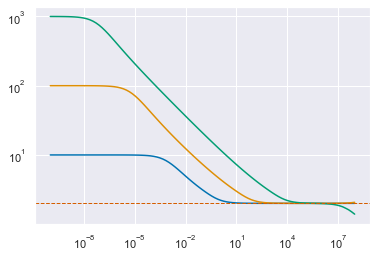

In [4]:
plt.plot(vls, dfs1)
plt.plot(vls, dfs2)
plt.plot(vls, dfs3)
plt.yscale('log')
plt.xscale('log')
plt.axhline(2, linewidth=1, color='r', ls='--'); 

In [5]:
S = make_S(500, 1e-2)

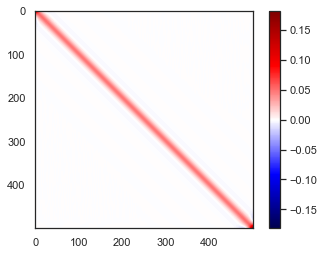

26.08497147324206


In [6]:
with sns.axes_style('white'):
    limit = max(np.abs(np.max(S)), np.abs(np.min(S)))
    plt.imshow(S, vmin=-limit, vmax=limit, cmap='seismic')
    plt.colorbar()
plt.show()
print(np.sum(np.diag(S)))

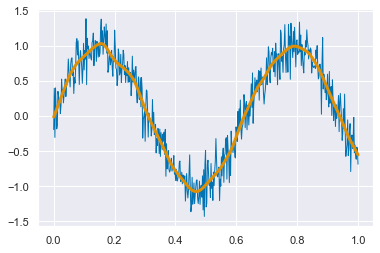

In [7]:
x = np.linspace(0, 1, S.shape[0])
y = np.sin(10*x)
y_cor = y + 0.2 * np.random.randn(len(y))
plt.plot(x, y_cor, linewidth=1);
plt.plot(x, S @ y_cor, linewidth=3);

In [8]:
t = np.linspace(0, 1000, len(x))
y2 = 0.5 * (np.sin(2 * np.pi * t * 5 / (500.)) + np.cos(2 * np.pi * t * 2.5 / (500.) - 50))
y2_cor = y2 + 1 * np.random.randn(len(x))

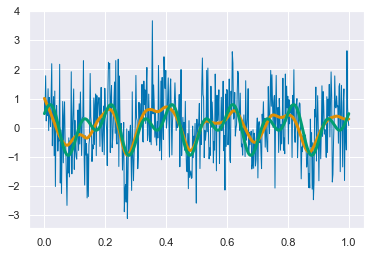

In [9]:
plt.plot(x, y2_cor, linewidth=1)
plt.plot(x, S @ y2_cor, linewidth=3)
plt.plot(x, y2, linewidth=3);